# Graph Coloring

##### What is the graph coloring problem?
The graph coloring problem is the a problem where you are given a graph and you have to determine the coloring with the minimum number of colors needed to color every vertex such that no edge in the graph will have two endpoints with the same color. The chromatic number is a term for the minimum number of colors needed for a coloring. There are some thoerems in graph theory that we can use on special graphs and to give upper bounds on the number of colors needed. One theorem that is important is that the chromatic number for any graph will be less than or equal to the maximum degree of all the vertices. We also know that the chromatic number for any complete graph on n-vertices is n+1. 

##### Is there a algorithm to find a coloring? 
No, graph coloring is a NP-hard problem so there is no polynomial time algorithms for the graph coloring problem. 

In [2]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

Since we do not have a polynomial time algorithm for the graph coloring I will explore some approximations. The approximation below is a greedy approach to the graph coloring method. The simplest way to take the greedy approach would be to go through the vertices and color the vertex with the minimum number such that none of its neighbors have the same color and repeat. However I would like to add a piece to the algorithm an instead I want to first color all of the vertices with the largest degrees. 

In this algorithm I will represent the graph as an adjacency matrix. If the number of nodes in a graph is n then our adjancency matrix will be a 2d matrix of size n x n. Where each entry represents whether or not there is a edge between the nodes. Since we are not dealing with a weighted graph there will be a 0 if there is no edge and 1 represents an edge between node i and node j. 

So my algorithm will go something like this,
First create an array that is the same size as the number of nodes in the graph if a node has not yet been colored it will be given a value of zero. Next we will set up a dictionary to keep track of the degree of each node in the graph. We will use the dictionary to get the number of the node that has the maximum degree, a dictionary is used as it allows us to store the degree value and the node number a list is not as convenient as if we delete values then it becomes difficult to access what node the maximum degree belongs to. After finding the maximum degree vertex we will go throught the related row in the adjancency matrix and check if there are any values of 1 if there is this means that there is an edge between those nodes and in this case we will check if the neighbor has yet to be colored if it has we will add the color to a list that contains the colors or the neighbors of our current node. Once we check all of the noeghbors then we find the minimum color that is greater than or equal to 1 such that none of the neighboring vertices have the same color. Then we repeat this process until every node in the graph has been colored. 

In [5]:
def greedygraph(matrix):
    #have 0 as the value of a node that is uncolored 
    colors = np.zeros(len(matrix))
    
    degree_dict = dict()
    for i  in range(len(matrix)):
        deg = np.sum(matrix[i])
        degree_dict[i] = deg
        
    while degree_dict:
        max_value_key = max(degree_dict, key=degree_dict.get)
        
        neighbor_colors = []
        for i in range(len(matrix)):
            if matrix[max_value_key][i] == 1:
                if colors[i] != 0:
                    neighbor_colors.append(colors[i])

        if len(neighbor_colors) == 0:
            colors[max_value_key] = 1 
        else:
            for i in range(1, len(matrix)+2):
                if i not in neighbor_colors:
                    colors[max_value_key] = i
                    break
        del degree_dict[max_value_key]
            

    return colors



Lets try this on a graph where we know what the chromatic number is

In [6]:
graph = np.ones((5,5)) - np.eye(5)
graph

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [7]:
k5_colors = greedygraph(graph)

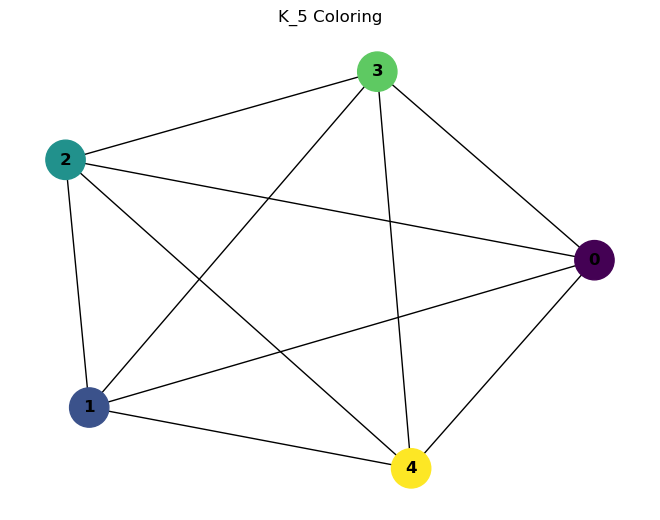

In [8]:
G = nx.complete_graph(5)

nx.draw(G, with_labels=True, node_color=list(k5_colors), node_size=800, font_size=12, font_weight='bold')

plt.title("K_5 Coloring")
plt.show()

This is actually a proper coloring for this graph , which is great ! However, that is a pretty simple case now lets try a bit of a different graph. Let's try on a bipartite graph as we know for any bipartite graph the chromatic number will be 2. 

In [9]:
bipartite =  np.array([
    [0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0]
])


In [10]:
bp_colors =greedygraph(bipartite)


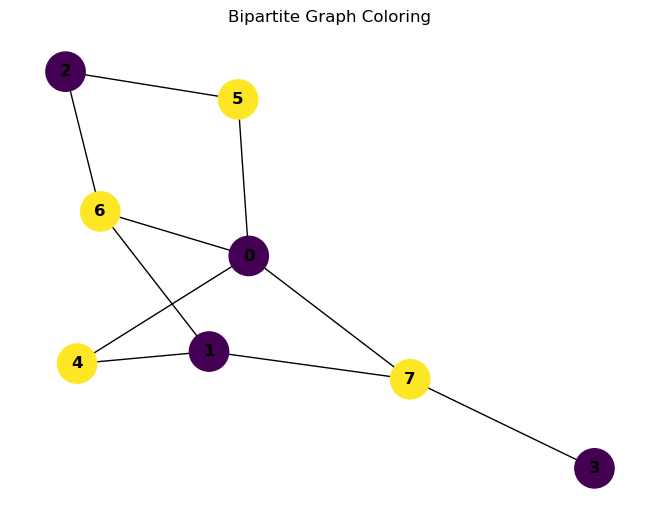

In [11]:
G = nx.from_numpy_matrix(bipartite)
nx.draw(G, with_labels=True, node_color=list(bp_colors), node_size=800, font_size=12, font_weight='bold')

plt.title("Bipartite Graph Coloring")
plt.show()

Again our greedy approach is successful. Now let's try on a famous graph called the petersen graph which the chromatic number is 3. 

In [12]:
petersen = np.array([
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
])

In [13]:
colors_peter = greedygraph(petersen)

Again just as we expected now, the package networkX also has a greedy coloring method so I will try that on the results to see if they are similar


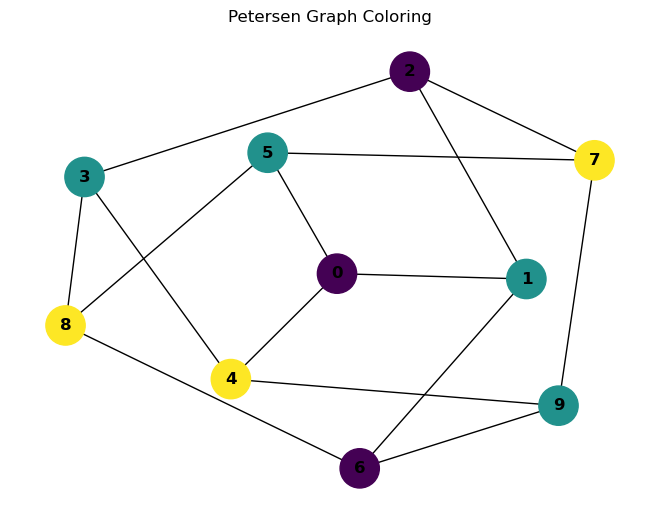

In [14]:
G = nx.petersen_graph()

nx.draw(G, with_labels=True, node_color=list(colors_peter), node_size=800, font_size=12, font_weight='bold')

plt.title("Petersen Graph Coloring")
plt.show()

It seems that the actual placement of the colors on the graph is slighly different between the two algorithms even though they have the same chromatic number. This implies that even though they are both greedy algorithms with similar results the underlying algorithm is definitly different. 

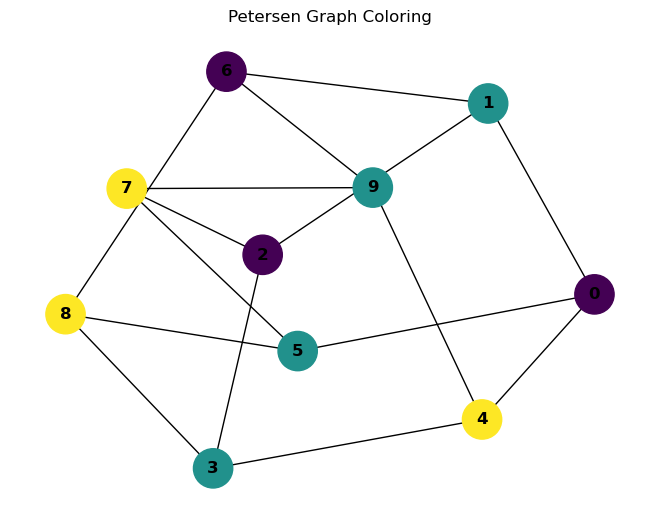

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.petersen_graph()

coloring = nx.greedy_color(G)

nx.draw(G, with_labels=True, node_color=list(coloring.values()), node_size=800, font_size=12, font_weight='bold')

plt.title("Petersen Graph Coloring")
plt.show()

In [17]:

k333 = np.array(
      [[0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0.]])

k33_colors = greedygraph(k333)

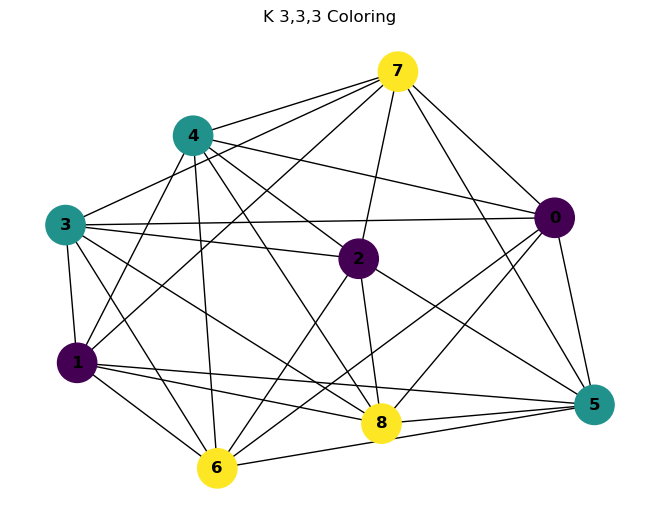

In [18]:
G = nx.from_numpy_matrix(k333)
nx.draw(G, with_labels=True, node_color=list(k33_colors), node_size=800, font_size=12, font_weight='bold')

plt.title("K 3,3,3 Coloring")
plt.show()

In [21]:
adjacency_matrix = np.array([
    [0, 1, 1, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 1],
    [0, 0, 0, 1, 1, 1, 0]
])

In [23]:
colors = greedygraph(adjacency_matrix)

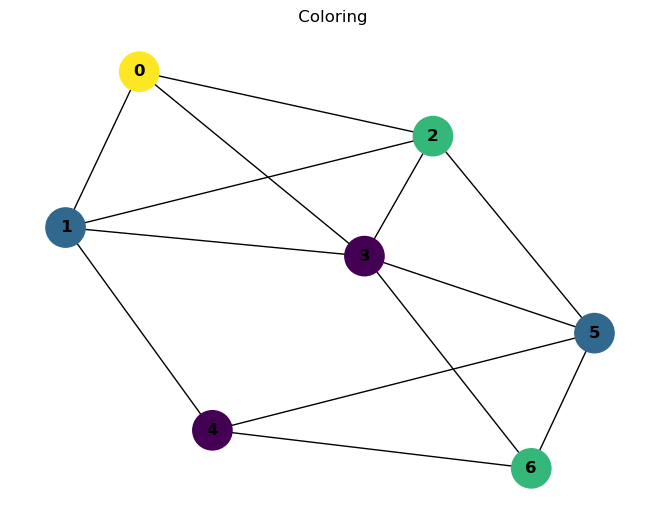

In [24]:
G = nx.from_numpy_matrix(adjacency_matrix)
nx.draw(G, with_labels=True, node_color=list(colors), node_size=800, font_size=12, font_weight='bold')

plt.title(" Coloring")
plt.show()

/var/folders/9w/6j4zknps5cl919ny618qvw4w0000gn/T/ipykernel_2375/3255509934.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(graph).todense()


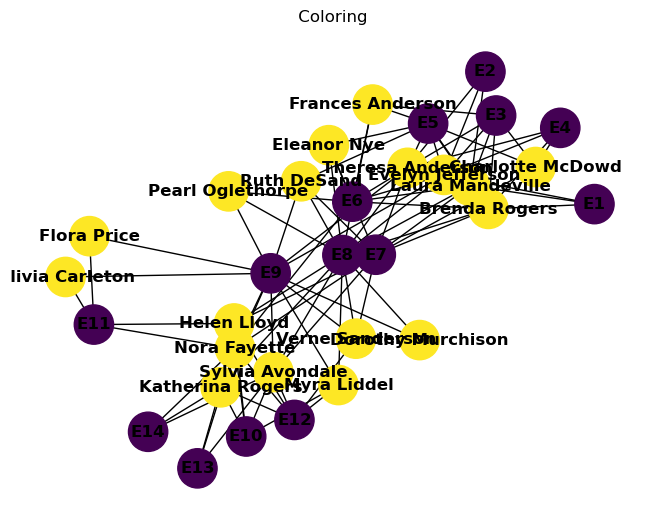

In [37]:
graph = nx.davis_southern_women_graph()
#colors = greedygraph(graph)
adj = nx.adjacency_matrix(graph).todense()
adj = np.array(adj)

colors = greedygraph(adj)

nx.draw(graph, with_labels=True, node_color=list(colors), node_size=800, font_size=12, font_weight='bold')

plt.title(" Coloring")
plt.show()


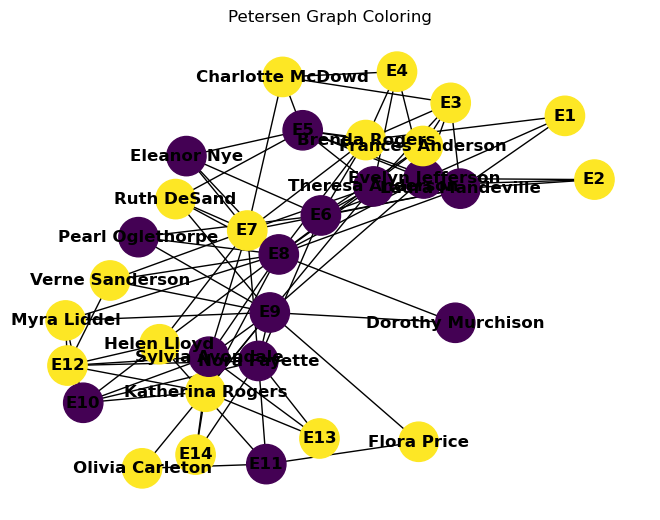

In [38]:
coloring = nx.greedy_color(graph)

nx.draw(graph, with_labels=True, node_color=list(coloring.values()), node_size=800, font_size=12, font_weight='bold')

plt.title("Petersen Graph Coloring")
plt.show()

/var/folders/9w/6j4zknps5cl919ny618qvw4w0000gn/T/ipykernel_2375/1729180050.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(graph).todense()


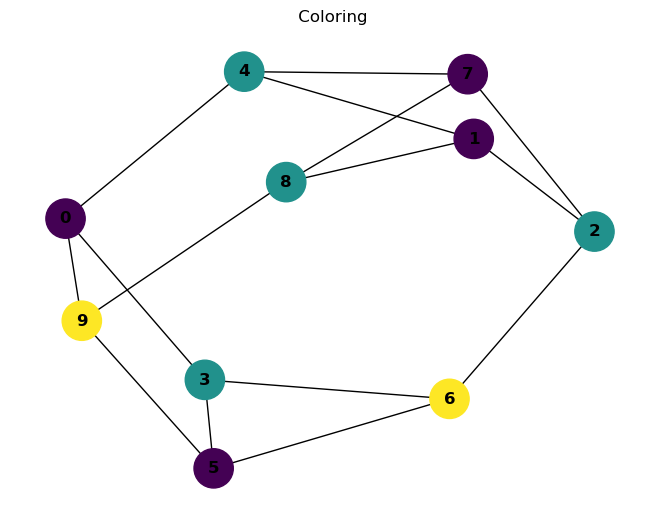

In [39]:
graph = nx.random_regular_graph(3, 10)
#colors = greedygraph(graph)
adj = nx.adjacency_matrix(graph).todense()
adj = np.array(adj)

colors = greedygraph(adj)

nx.draw(graph, with_labels=True, node_color=list(colors), node_size=800, font_size=12, font_weight='bold')

plt.title(" Coloring")
plt.show()


It seems that for most of the graphs the network x greedy algorithm is slightly different to my algorithm. They may have implemented the algorithm in a way that the order in which they color the vertices is different to me for exampple they might just color in the order of the the vertices as they are given.